In [ ]:
#  https://archive.ics.uci.edu/ml/datasets/CNNpred%3A+CNN-based+stock+market+prediction+using+a+diverse+set+of+variables

'''
Looking at the Dow Jones index data in the CNN-pred stock data. 

I ran various models over this data, to predict the weekly percent change in the closing price of the Down JOnes index, and 
was failing to get anything of predictive value.. anything with an R^2 > 0. So I decided to take the seasonal element out of
the data to smoothen it out and experiment with predicting the precent change in that. 

I was more succesful, getting an R^2 as high as 0.2 at once point. 

I'd occassionally use permutation importance or feature importance to see which features the model would use more, and to 
isolate and simplify the model to get slightly better results. 

'''

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import datetime 

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
filename_prefix = 'C://Users/Tim/Downloads/CNNpred'

djiDF = pd.read_csv(filename_prefix + '/Processed_DJI.csv', index_col = 'Date', parse_dates = True)
nasdaqDF = pd.read_csv(filename_prefix + '/Processed_NASDAQ.csv')
nyseDF = pd.read_csv(filename_prefix + '/Processed_NYSE.csv')
russellDF = pd.read_csv(filename_prefix + '/Processed_RUSSELL.csv')
spDF = pd.read_csv(filename_prefix + '/Processed_S&P.csv')


In [26]:
n = 19 # not TE1, TE2, TE3, DE1, DE2, DE4, DE5, DE6

not_null_cols = djiDF.columns[:19]

dataDF = djiDF.dropna(subset = not_null_cols).fillna(djiDF.mean()) #.fillna(-100)

<ipython-input-6-a6f7a5774cbf>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df_close, model='multiplicative', freq = 30)


<Figure size 432x288 with 0 Axes>

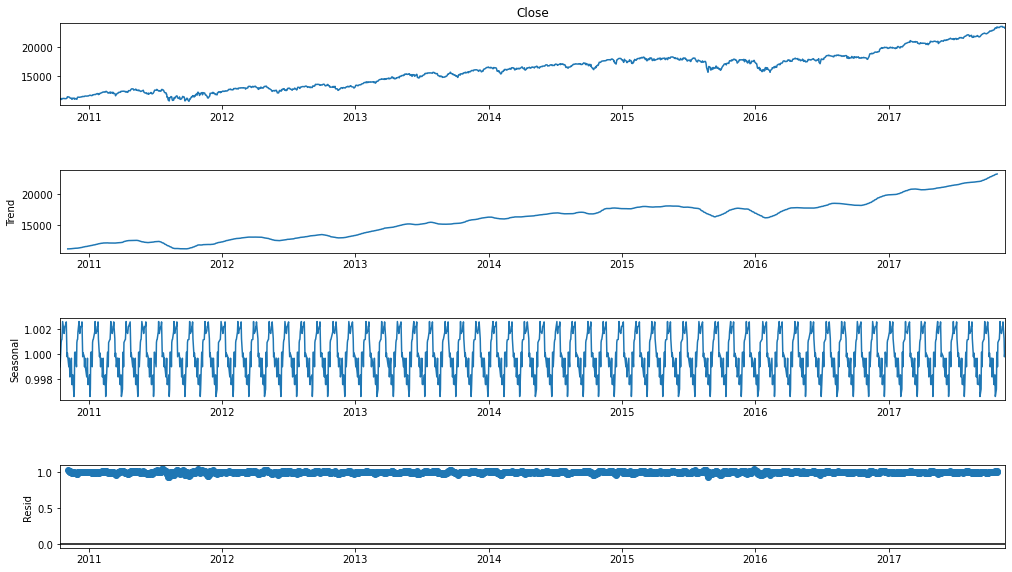

In [6]:
df_close = dataDF['Close']

result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

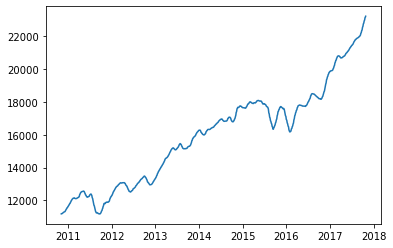

In [7]:
trend = result.trend.dropna()
trend
plt.plot(trend)

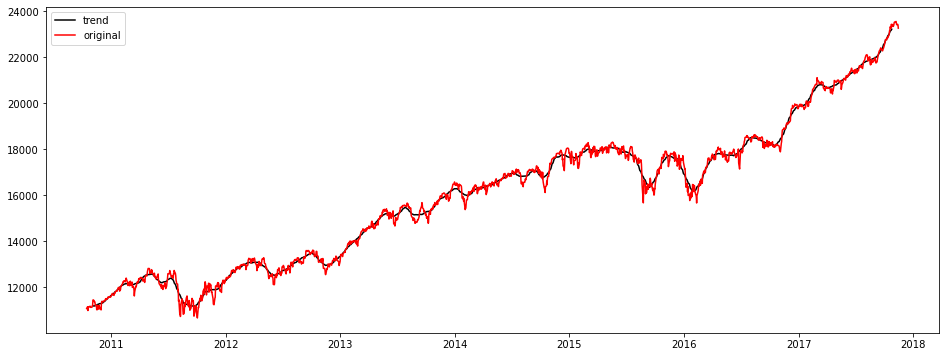

In [390]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6


plt.plot(trend, color ="black", label = "trend")
plt.plot(df_close, color="red", label = "original")
plt.legend()
plt.show()

In [14]:
trend

Date
2010-11-05    11178.840186
2010-11-08    11176.374170
2010-11-09    11178.698991
2010-11-10    11187.559001
2010-11-11    11195.725000
                  ...     
2017-10-19    23109.445020
2017-10-20    23144.409375
2017-10-23    23176.063054
2017-10-24    23203.561393
2017-10-25    23226.518718
Name: trend, Length: 1755, dtype: float64

In [21]:
trendDF

trend
Date                    
2010-11-05  11178.840186
2010-11-08  11176.374170
2010-11-09  11178.698991
2010-11-10  11187.559001
2010-11-11  11195.725000
...                  ...
2017-10-19  23109.445020
2017-10-20  23144.409375
2017-10-23  23176.063054
2017-10-24  23203.561393
2017-10-25  23226.518718

[1755 rows x 1 columns]

In [27]:
trendDF = pd.DataFrame(trend)


dataDF = pd.concat([dataDF, trendDF], axis = 1)

dataDF.iloc[30: ,:]

Close     Volume       mom      mom1      mom2      mom3  \
Date                                                                          
2010-11-29  11052.490234  -5.328637 -0.003550 -0.008528  0.013674 -0.012722   
2010-11-30  11006.019531  -0.837462 -0.004205 -0.003550 -0.008528  0.013674   
2010-12-01  11255.780273   1.251940  0.022693 -0.004205 -0.003550 -0.008528   
2010-12-02  11362.410156   0.086004  0.009473  0.022693 -0.004205 -0.003550   
2010-12-03  11382.089844   4.357322  0.001732  0.009473  0.022693 -0.004205   
...                  ...        ...       ...       ...       ...       ...   
2017-11-09  23461.939453   6.511740 -0.004304  0.000260  0.000374  0.000392   
2017-11-10  23422.210938  -0.991838 -0.001693 -0.004304  0.000260  0.000374   
2017-11-13  23439.699219 -65.347705  0.000747 -0.001693 -0.004304  0.000260   
2017-11-14  23409.470703  -1.387911 -0.001290  0.000747 -0.001693 -0.004304   
2017-11-15  23271.279297   3.612171 -0.005903 -0.001290  0.000747 -0.001693   

               ROC_5    ROC_10    ROC_15    ROC_20  ...  silver-F  RUSSELL-F  \
Date                                                ...                        
2010-11-29 -1.348319 -1.251631 -3.421768 -0.593606  ...      1.81      -0.37   
2010-11-30 -1.543671 -1.749248 -3.513859 -1.066109  ...      3.82      -0.56   
2010-12-01  1.988064  2.107137 -0.801725  0.599359  ...      0.72       2.12   
2010-12-02  1.565438  3.220695  0.047284  1.313228  ...      0.54       1.29   
2010-12-03  2.616509  1.796398  0.877332 -0.461309  ...      2.45       0.43   
...              ...       ...       ...       ...  ...       ...        ...   
2017-11-09 -0.230990  0.261016  1.290420  2.718486  ...     -0.62      -0.34   
2017-11-10 -0.496952 -0.051116  0.401138  2.406860  ...     -0.58      -0.20   
2017-11-13 -0.461690  0.389567  0.712119  2.102797  ...      0.72      -0.04   
2017-11-14 -0.627237  0.137871 -0.137742  1.791640  ...      0.17      -0.21   
2017-11-15 -1.239552 -0.698658 -0.249391  0.490896  ...     -0.60      -0.46   

            S&P-F   CHF  Dollar index-F  Dollar index  wheat-F   XAG   XAU  \
Date                                                                         
2010-11-29   0.27 -0.21            0.58          0.58     0.69  1.65  0.29   
2010-11-30  -0.59  0.17            0.46          0.45    -0.25  3.54  1.20   
2010-12-01   2.12  0.01           -0.63         -0.59     7.11  1.32  0.16   
2010-12-02   1.52 -0.99           -0.52         -0.51     1.29  0.21 -0.18   
2010-12-03   0.06 -1.95           -1.16         -1.15     4.31  2.91  2.20   
...           ...   ...             ...           ...      ...   ...   ...   
2017-11-09  -0.27 -0.61           -0.44         -0.45     0.53 -0.26  0.32   
2017-11-10  -0.17  0.18           -0.07         -0.05     0.70 -0.71 -0.80   
2017-11-13   0.10  0.06            0.12          0.11    -1.85  0.83  0.16   
2017-11-14  -0.15 -0.70           -0.71         -0.70     1.00  0.01  0.24   
2017-11-15  -0.50 -0.11            0.01         -0.02    -2.04 -0.22 -0.11   

                   trend  
Date                      
2010-11-29  11281.545850  
2010-11-30  11284.218685  
2010-12-01  11289.869694  
2010-12-02  11297.022868  
2010-12-03  11305.162549  
...                  ...  
2017-11-09           NaN  
2017-11-10           NaN  
2017-11-13           NaN  
2017-11-14           NaN  
2017-11-15           NaN  

[1755 rows x 84 columns]

In [29]:
from datetime import timedelta

predict_days = 7 

dataDF['date_prediction'] = dataDF.index + timedelta(predict_days)
#index_shift = dataDF.index - timediff(predict_days)
label_col = dataDF[['trend']]
label_col.columns = ['predict_label']
label_col['date_prediction'] = label_col.index


dataDF['Date'] = dataDF.index
dataDF2 = pd.merge(dataDF, label_col, how = 'inner', on = 'date_prediction')
dataDF2.index = dataDF2['Date']
dataDF2 = dataDF2.drop(columns = ['Date'])

<ipython-input-29-f96ffebf70f0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_col['date_prediction'] = label_col.index


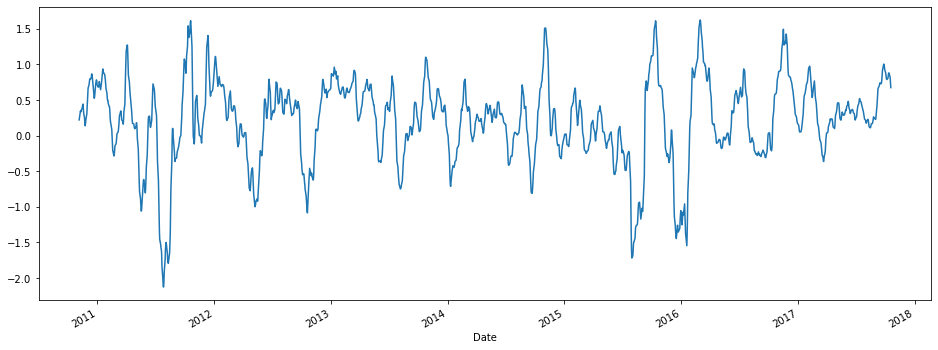

In [31]:
dataDF2['percent_label'] = 100*(dataDF2['predict_label'] - dataDF2['trend'])/dataDF2['trend']

dataDF2['percent_label'].plot(figsize = (16, 6))

In [38]:
dataDF2.dropna()

Close     Volume       mom      mom1      mom2      mom3  \
Date                                                                          
2010-11-05  11444.080078  -2.676227  0.000808  0.019590  0.002360  0.005762   
2010-11-08  11406.839844  -2.732717 -0.003254  0.000808  0.019590  0.002360   
2010-11-09  11346.750000  -1.614411 -0.005268 -0.003254  0.000808  0.019590   
2010-11-10  11357.040039  -0.360910  0.000907 -0.005268 -0.003254  0.000808   
2010-11-11  11283.099609 -64.994320 -0.006511  0.000907 -0.005268 -0.003254   
...                  ...        ...       ...       ...       ...       ...   
2017-10-12  22841.009766  -5.714772 -0.001394  0.001849  0.003058 -0.000553   
2017-10-13  22871.720703  -0.931836  0.001345 -0.001394  0.001849  0.003058   
2017-10-16  22956.960938  -2.286300  0.003727  0.001345 -0.001394  0.001849   
2017-10-17  22997.439453   4.627899  0.001763  0.003727  0.001345 -0.001394   
2017-10-18  23157.599609  -0.673949  0.006964  0.001763  0.003727  0.001345   

               ROC_5    ROC_10    ROC_15    ROC_20  ...   CHF  Dollar index-F  \
Date                                                ...                         
2010-11-05  2.928364  2.798283  3.446691  3.975836  ...  0.42            0.91   
2010-11-08  2.536893  2.174749  2.361421  3.601160  ...  0.53            0.61   
2010-11-09  1.412407  1.587275  3.353153  2.961323  ...  0.13            0.54   
2010-11-10  1.265346  2.074006  2.242267  2.351821  ...  0.23            0.24   
2010-11-11 -1.326999  1.521956  1.224855  1.699293  ...  0.59            0.76   
...              ...       ...       ...       ...  ...   ...             ...   
2017-10-12  0.288114  2.054450  2.154722  2.871303  ...  0.20            0.08   
2017-10-13  0.430544  2.082700  2.336199  2.709591  ... -0.09            0.04   
2017-10-16  0.860639  1.770407  2.964067  2.801494  ...  0.10            0.24   
2017-10-17  0.730420  1.571304  3.200094  2.801145  ...  0.30            0.20   
2017-10-18  1.244744  2.188540  3.656503  3.324068  ...  0.33           -0.13   

            Dollar index  wheat-F   XAG   XAU         trend  date_prediction  \
Date                                                                           
2010-11-05          0.88     1.18  1.40  0.08  11178.840186       2010-11-12   
2010-11-08          0.63     1.10  3.63  1.12  11176.374170       2010-11-15   
2010-11-09          0.53    -2.27 -3.03 -1.31  11178.698991       2010-11-16   
2010-11-10          0.25    -1.53  1.49  0.92  11187.559001       2010-11-17   
2010-11-11          0.76    -0.70  1.65  0.40  11195.725000       2010-11-18   
...                  ...      ...   ...   ...           ...              ...   
2017-10-12          0.04    -0.75  0.32  0.12  22907.565918       2017-10-19   
2017-10-13          0.03     2.21  0.95  0.75  22946.676400       2017-10-20   
2017-10-16          0.24    -0.80 -1.03 -0.66  22987.375228       2017-10-23   
2017-10-17          0.21    -0.34 -1.03 -0.70  23029.462565       2017-10-24   
2017-10-18         -0.16    -1.09 -0.38 -0.44  23071.055208       2017-10-25   

            predict_label  percent_label  
Date                                      
2010-11-05   11203.477506       0.220392  
2010-11-08   11210.556527       0.305845  
2010-11-09   11217.192041       0.344343  
2010-11-10   11224.638704       0.331437  
2010-11-11   11233.641195       0.338667  
...                   ...            ...  
2017-10-12   23109.445020       0.881277  
2017-10-13   23144.409375       0.861706  
2017-10-16   23176.063054       0.820832  
2017-10-17   23203.561393       0.755983  
2017-10-18   23226.518718       0.673847  

[1692 rows x 87 columns]

In [476]:
feat_cols = [c for c in dataDF2.columns if (('label' not in c) & ('Name' != c) 
                                           & ('date_prediction' != c) & ('Close' != c) & ('trend' != c) & ('Volume' != c))]

feat_cols = [c for c in feat_cols if (('Close' not in c) & ('EMA' not in c))]
feat_cols = ['ROC_10','ROC_15', 'ROC_5','DTB4WK','DTB6','DTB3','DE4','CTB3M','ROC_20','TE2','TE1','wheat-F','TE3','mom1','CNY','XOM','mom', 'RUT', 'NZD', 'RUSSELL-F']
label_col = ['percent_label']

feat_cols

['ROC_10',
 'ROC_15',
 'ROC_5',
 'DTB4WK',
 'DTB6',
 'DTB3',
 'DE4',
 'CTB3M',
 'ROC_20',
 'TE2',
 'TE1',
 'wheat-F',
 'TE3',
 'mom1',
 'CNY',
 'XOM',
 'mom',
 'RUT',
 'NZD',
 'RUSSELL-F']

In [477]:
featDF = dataDF2[feat_cols + label_col].dropna()
featDF['label'] = featDF[label_col[0]]
featDF = featDF.drop(columns = label_col)

part = 0.70
train_data, test_data = featDF[3:int(len(featDF)*part)], featDF[int(len(featDF)*part):]

In [530]:
X = train_data.drop(columns = ['label'])
y = np.array(train_data['label'])
X_test = test_data.drop(columns = ['label'])
y_test = np.array(test_data['label'])

In [607]:
from sklearn import tree, ensemble, neighbors, neural_network





#clf = ensemble.AdaBoostRegressor(base_estimator = tree.DecisionTreeRegressor(max_depth=7), n_estimators = 600)
#clf = ensemble.GradientBoostingRegressor(max_depth = 3, n_estimators = 400, learning_rate = 0.05, subsample = 0.7)

#clf = neighbors.KNeighborsRegressor(n_neighbors = 30, weights = 'uniform', algorithm = 'kd_tree')
#clf = neural_network.MLPRegressor(max_iter = 200, alpha = 0.001)

#clf = ensemble.BaggingRegressor(base_estimator=neighbors.KNeighborsRegressor(n_neighbors = 20), max_samples = 0.4, n_estimators=200) #, random_state=0)
clf = ensemble.BaggingRegressor(n_estimators=200) #, random_state=0)



clf = clf.fit(X, y)

In [608]:
predict = clf.predict(X_test)
score = clf.score(X_test, y_test)
score

0.22957109718693147

In [609]:
predict2 = clf.predict(X)
score = clf.score(X, y)
score

0.940931226243782

No handles with labels found to put in legend.


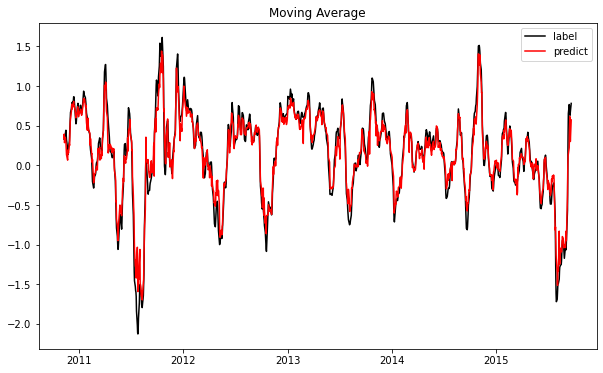

In [610]:
predictDF = pd.DataFrame(index = train_data.index, data = predict2, columns = ['prediction'])

from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

#original_label = featDF[int(len(featDF)*part):][test_data.index]

plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(train_data['label'], color ="black", label = "label")
plt.plot(predictDF['prediction'], color="red", label = "predict")
#plt.plot(original_label, color='green', label = 'original')
plt.legend()
plt.show()

No handles with labels found to put in legend.


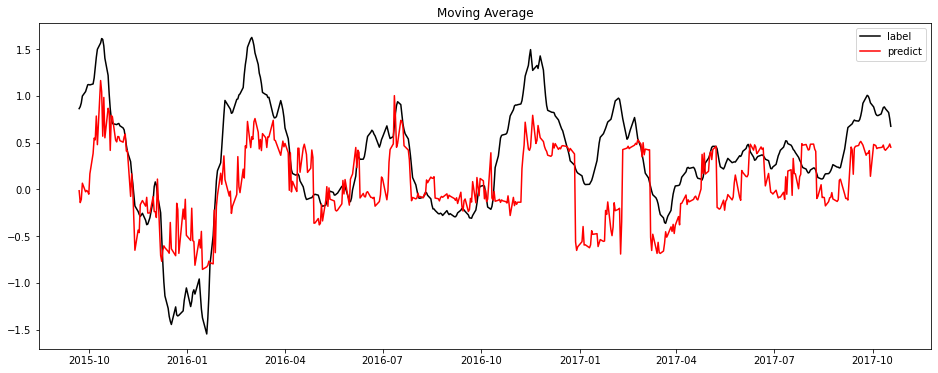

In [612]:
predictDF = pd.DataFrame(index = test_data.index, data = predict, columns = ['prediction'])

from pylab import rcParams
rcParams['figure.figsize'] = 16, 6

#original_label = featDF[int(len(featDF)*part):][test_data.index]

plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(test_data['label'], color ="black", label = "label")
plt.plot(predictDF['prediction'], color="red", label = "predict")
#plt.plot(original_label, color='green', label = 'original')
plt.legend()
plt.show()

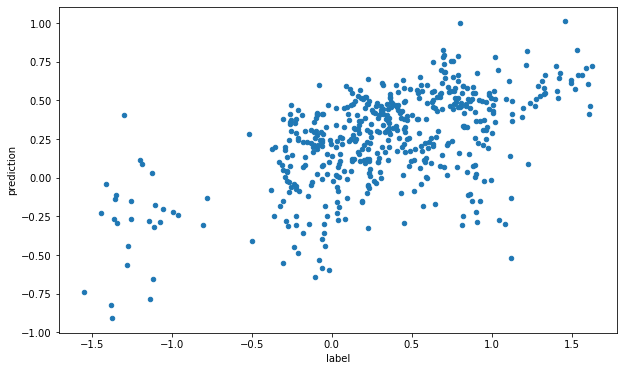

In [546]:
resultsDF = pd.concat([test_data, predictDF], axis = 1)
resultsDF.plot.scatter(x = 'label', y = 'prediction')

In [547]:
eps = 0.0
resultsDF['label_class'] = 0 
resultsDF.loc[resultsDF['label'] >= eps, 'label_class'] = 1
resultsDF.loc[resultsDF['label'] <= -eps, 'label_class'] = -1
resultsDF['prediction_class'] = 0 
resultsDF.loc[resultsDF['prediction'] >= eps, 'prediction_class'] = 1
resultsDF.loc[resultsDF['prediction'] <= -eps, 'prediction_class'] = -1


In [548]:
from sklearn import metrics

metrics.confusion_matrix(np.array(resultsDF['label_class']), np.array(resultsDF['prediction_class']))

array([[ 60,  75],
       [ 40, 333]], dtype=int64)

In [549]:
metrics.precision_recall_fscore_support(np.array(resultsDF['label_class']), np.array(resultsDF['prediction_class']))

(array([0.6       , 0.81617647]),
 array([0.44444444, 0.89276139]),
 array([0.5106383 , 0.85275288]),
 array([135, 373], dtype=int64))

In [529]:
feat_impDF = pd.DataFrame(zip(feat_cols, clf.feature_importances_), columns = ['feature', 'importance'])

feat_impDF.sort_values('importance', ascending = False) #.loc[:20, :]

feature  importance
0      ROC_10    0.204134
6         DE4    0.102758
4        DTB6    0.098683
8      ROC_20    0.079678
1      ROC_15    0.075398
12        TE3    0.065748
10        TE1    0.057672
9         TE2    0.049062
2       ROC_5    0.041600
3      DTB4WK    0.032130
7       CTB3M    0.027639
11    wheat-F    0.025915
15        XOM    0.024936
5        DTB3    0.024689
13       mom1    0.017395
14        CNY    0.016848
18        NZD    0.016631
16        mom    0.016063
17        RUT    0.012396
19  RUSSELL-F    0.010624

In [416]:
from sklearn.inspection import permutation_importance

r = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=0)




In [ ]:
feats = ['ROC_15', 'ROC_10', 'CTB3M', 'TE5', 'mom2']

In [417]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{list(test_data.columns)[i]:<8}"
        f"{r.importances_mean[i]:.3f}"
        f" +/- {r.importances_std[i]:.3f}")

ROC_15  0.125 +/- 0.017
ROC_10  0.069 +/- 0.013
CTB3M   0.000 +/- 0.000
TE5     0.000 +/- 0.000
mom2    0.000 +/- 0.000


In [474]:
['ROC_10','ROC_15', 'ROC_5','DTB4WK','DTB6','DTB3','DE4','CTB3M','ROC_20','TE2','TE1','wheat-F','TE3','mom1','CNY','XOM','mom', 'RUT', 'NZD', 'RUSSELL-F']

['ROC_10',
 'ROC_15',
 'ROC_5',
 'DTB4WK',
 'DTB6',
 'DTB3',
 'DE4',
 'CTB3M',
 'ROC_20',
 'TE2',
 'TE1',
 'wheat-F',
 'TE3',
 'mom1',
 'CNY',
 'XOM',
 'mom',
 'RUT',
 'NZD',
 'RUSSELL-F']

In [412]:


for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{list(test_data.columns)[i]:<8}"
        f"{r.importances_mean[i]:.3f}"
        f" +/- {r.importances_std[i]:.3f}")

ROC_10  0.336 +/- 0.016
ROC_15  0.118 +/- 0.005
ROC_5   0.035 +/- 0.004
DTB4WK  0.015 +/- 0.003
DTB6    0.012 +/- 0.005
DTB3    0.010 +/- 0.002
DE4     0.006 +/- 0.002
CTB3M   0.005 +/- 0.001
ROC_20  0.004 +/- 0.002
TE2     0.004 +/- 0.001
TE1     0.003 +/- 0.001
wheat-F 0.003 +/- 0.001
TE3     0.002 +/- 0.000
mom1    0.002 +/- 0.001
CNY     0.002 +/- 0.001
XOM     0.002 +/- 0.001
mom     0.002 +/- 0.000
RUT     0.001 +/- 0.001
NZD     0.001 +/- 0.000
RUSSELL-F0.001 +/- 0.000


In [406]:
from sklearn.inspection import permutation_importance

result = permutation_importance(clf, X_test, y_test, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()


tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5


KeyboardInterrupt: 

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(data.feature_names[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=data.feature_names[perm_sorted_idx])
fig.tight_layout()
plt.show()